# Trabajo Práctico 2 - Matrices de Insumo Producto

Álgebra Lineal Computacional - 2do cuatrimestre 2024

Grupo: TIBURONES


Integrantes | Lib. | Email
:---: | :---: | :---:
Victoria Pérez Olivera | 604/23 | victoria.po@gmail.com
Ignacio Gallego | 733/22 | nachogallego01@gmail.com
Evangelina Fomina| 520/23 | evangelina.miloslav9@gmail.com

In [60]:
import numpy as np
import pandas as pd
import funciones as f
from scipy.linalg import norm
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

# Expresando (I-A)<sup>-1</sup> como una suma infinita

### Consigna 1 

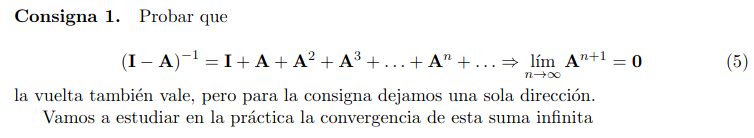

Vamos a llamar J(n) a la suma infinita, de tal manera que 

$$ J(n) = I + A + A^2 + A^3 + ... + A^n $$

Multiplicamos por izquierda por $(I-A)$

$$ (I-A) J(n) = (I-A) (I + A + A^2 + A^3 + ... + A^n) $$
$$ (I-A) J(n) = I (I + A + A^2 + A^3 + ... + A^n) - A(I + A + A^2 + A^3 + ... + A^{n-1} + A^n) $$
$$ (I-A) J(n) = I + A + A^2 + A^3 + ... + A^n - A - A^2 - A^3 - ... -  A^n - A^{n+1} $$
$$ (I-A) J(n) = I - A^{n+1} $$

Tomamos $ \lim_{n \to \infty}$ de toda la expresión de arriba. 

$$\lim_{n \to \infty} (I-A) J(n) = \lim_{n \to \infty} I - A^{n+1}$$

Sabemos por hipótesis que $\lim_{n \to \infty} J(n) = (I-A)^{-1}$, entonces queda:

$$\lim_{n \to \infty} (I-A)(I-A)^{-1}  = \lim_{n \to \infty} I - \lim_{n \to \infty} A^{n+1}$$

$$\lim_{n \to \infty} I = \lim_{n \to \infty} I - \lim_{n \to \infty} A^{n+1}$$

Despejamos $\lim_{n \to \infty} A^{n+1}$.

$$ \lim_{n \to \infty} A^{n+1} = I-I = 0 $$

### Consigna 2 

Calculamos las normas de A1 y A2 elevados de 1 a 250

In [61]:
#Defino la matriz A1
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

#Defino la matriz A2

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])


In [62]:
I = np.eye(5)
#Defino las listas de normas
a1 = []
a2 = []
Ak1 = I
Ak2 = I
for i in range(250):
    Ak1 = A1 @ Ak1
    a1.append(norm(Ak1, 2))

    Ak2 = A2 @ Ak2
    a2.append(norm(Ak2, 2))



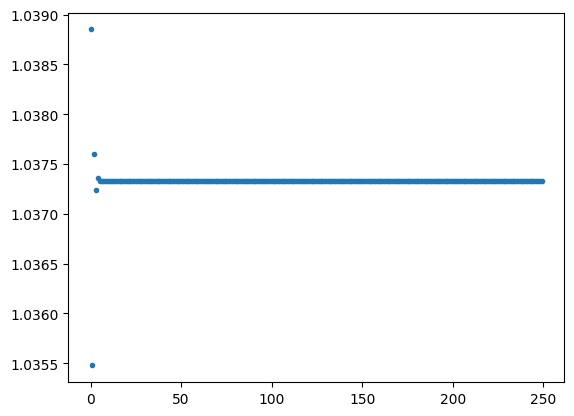

In [63]:
plt.plot(a1,".")

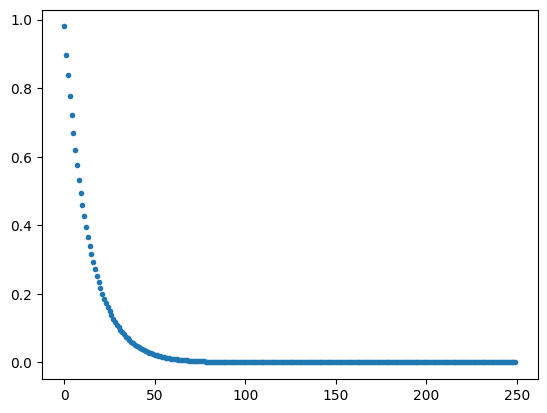

In [64]:
plt.plot(a2,".")

### Consigna 3 



Buscamos mayores autovalores de las matrices A1 y A2 usando el metodo de la potencia

In [65]:
# Número de iteraciones
k = 250

# Para la matriz A1
avalA1prom, avalA1desv = f.metodoMonteCarlo(A1,k)

# Para la matriz A2
avalA2prom, avalA2desv = f.metodoMonteCarlo(A2,k)



Hacemos una tabla de comparacion de promedio y desvio estandar de autovalores de las matrices A1 y A2

In [66]:
t = {"Promedio" : [avalA1prom, avalA2prom], "Desvio estandar" : [avalA1desv, avalA2desv]}
tabla = pd.DataFrame(data = t, index = ["A1", "A2"])
tabla

,Promedio,Desvio estandar
A1,1.0000,0.0
A2,0.9277,0.0


### Consigna 4

**(A)**     Graficamos la serie de potencias de (I-A)<sup>-1</sup>= I + A + A<sup>2</sup> + ... + A<sup>n</sup> para A<sub>1</sub> y A<sub>2</sub>, con n=10 y n=100

In [67]:
normas_A1_10 = f.seriePotencia(A1, 10)[1]
normas_A1_100 = f.seriePotencia(A1, 100)[1]
normas_A2_10 = f.seriePotencia(A2, 10)[1]
normas_A2_100 = f.seriePotencia(A2, 100)[1]

Text(0.5, 1.0, 'Norma de serie de potencias con A1 con 10 iteraciones')

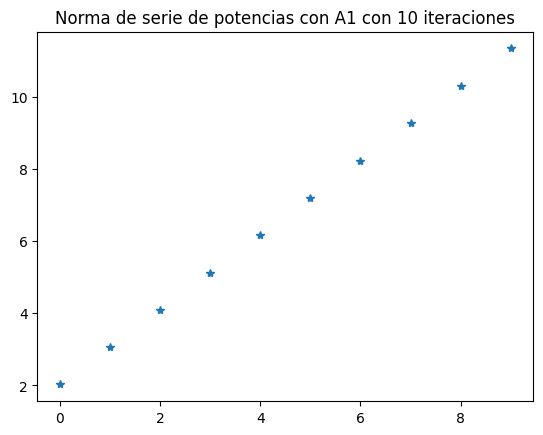

In [68]:
plt.plot(normas_A1_10, "*")
plt.title("Norma de serie de potencias con A1 con 10 iteraciones")

Text(0.5, 1.0, 'Norma de serie de potencias con A1 con 100 iteraciones')

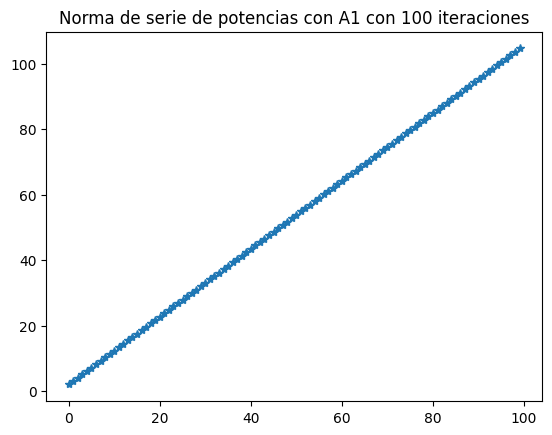

In [69]:
plt.plot(normas_A1_100, "*")
plt.title("Norma de serie de potencias con A1 con 100 iteraciones")

Text(0.5, 1.0, 'Norma de serie de potencias con A2 con 10 iteraciones')

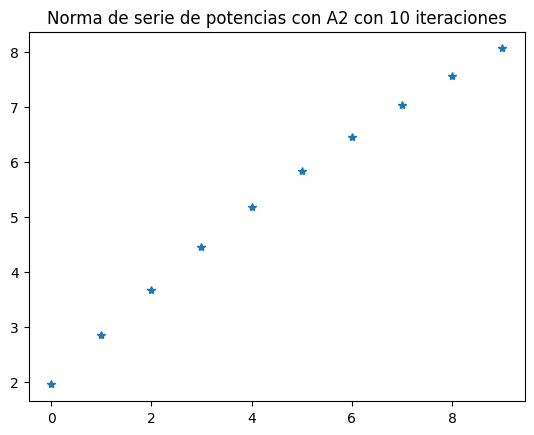

In [70]:
plt.plot(normas_A2_10, "*")
plt.title("Norma de serie de potencias con A2 con 10 iteraciones")

Text(0.5, 1.0, 'Norma de serie de potencias con A2 con 100 iteraciones')

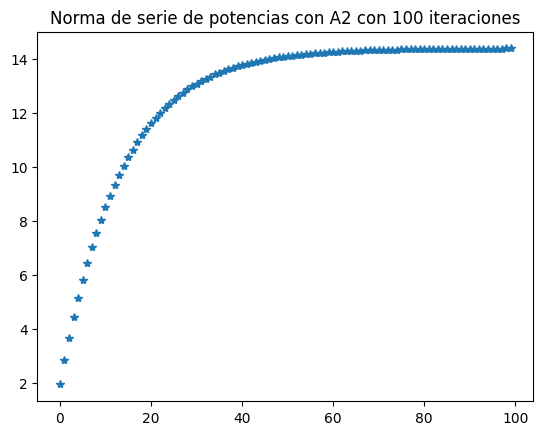

In [71]:
plt.plot(normas_A2_100, "*")
plt.title("Norma de serie de potencias con A2 con 100 iteraciones")

**(B)** Estudiamos la convergencia.

Podemos ver con el gráfico para n = 100 que la serie de potencias de la matriz A<sub>2</sub>, pasado cierto valor de n, empieza a crecer cada vez menos, hasta estabilizarse. Por lo cual podemos decir que converge para n grandes. 

La serie de potencias de a A<sub>1</sub>, en cambio, sigue creciendo de forma constante, al menos para n<100. 

De la misma forma para corroborar la convergencia podemos compararla con la matriz Leontieff:


In [72]:
matriz1 = f.seriePotencia(A1, 100)[0]
matriz2 = f.seriePotencia(A2, 100)[0]
leon1 = f.leontiefizar(A1)
leon2 = f.leontiefizar(A2)

In [73]:
print("Serie de potencias de matriz A1 \n {}".format(matriz1), "\n vs su Leontieff: \n {}".format(leon1))

Serie de potencias de matriz A1 
 [[22.97561228 22.25722415 21.74684827 22.00226293 21.92274209]
 [20.24682577 21.12459543 20.23597743 20.04492558 20.33780164]
 [19.50894394 19.49854538 20.77027447 19.75210775 19.61770921]
 [10.6031775  10.48502353 10.55312202 11.59554226 10.49416257]
 [27.66544051 27.63461151 27.69377781 27.60516148 28.62758449]] 
 vs su Leontieff: 
 [[-6.25109958e+15 -6.25109958e+15 -6.25109958e+15 -6.25109958e+15
  -6.25109958e+15]
 [-5.75272917e+15 -5.75272917e+15 -5.75272917e+15 -5.75272917e+15
  -5.75272917e+15]
 [-5.57919627e+15 -5.57919627e+15 -5.57919627e+15 -5.57919627e+15
  -5.57919627e+15]
 [-2.99770994e+15 -2.99770994e+15 -2.99770994e+15 -2.99770994e+15
  -2.99770994e+15]
 [-7.86453159e+15 -7.86453159e+15 -7.86453159e+15 -7.86453159e+15
  -7.86453159e+15]]


In [74]:
print("Serie de potencias de matriz A2 \n {}".format(matriz2), "\n vs su Leontieff: \n {}".format(leon2))

Serie de potencias de matriz A2 
 [[3.33210028 3.3316767  3.33134161 3.33150621 3.33145988]
 [2.00661088 3.54512884 3.12590721 2.69994597 3.06596301]
 [1.92550105 2.55590328 4.28285673 3.03687289 2.97340728]
 [1.20200895 1.42815124 1.74083696 2.66085342 1.59758535]
 [1.9057813  2.77836957 3.47933352 3.06953041 4.19195629]] 
 vs su Leontieff: 
 [[3.33333333 3.33333333 3.33333333 3.33333333 3.33333333]
 [2.0076768  3.54656093 3.12762897 2.70152545 3.06758254]
 [1.92658088 2.55735406 4.28460096 3.03847298 2.97504794]
 [1.20260924 1.42895775 1.7418066  2.66174293 1.5984974 ]
 [1.90691516 2.77989294 3.48116502 3.07121056 4.19367904]]


Como podemos obvservar, la segunda matriz en serie coverge a su Leontieff, y la primera no.

**(C)** Regla que se puede establecer para saber si la serie de potencias coverge o no

Podemos observar que los mayores autovalores que obtuvimos fueron 1 para A<sub>1</sub> y 0,927 para A<sub>2</sub>. 

Si el radio espectral de la matriz A es menor en valor absoluto que 1 entonces la serie converge, ya que la norma de A<sup>n</sup> va decreciendo en cada multiplicacion por A.

Si el radio espectral es igual o mayor en valor absoluto que 1 entonces diverge, ya que la norma de A<sup>n</sup>
o se mantiene igual o crece en cada multiplicacion subsecuente, y la suma infinita de términos que no decrecen diverge.

**(D)** Obtener el error: $e(n) =  ∥(I+ A+A^2+A^3+...+A^n)−(I−A)^{−1}∥_2 $


Obs: nuestra función "lenontiefizar", que usamos más arriba para calcular leon1 y leon2, utiliza inversaLU como pide la consigna

In [75]:
error1 = np.linalg.norm((matriz1-leon1), 2)  
error1

np.float64(2.9507176422289864e+16)

In [76]:
error2 = np.linalg.norm((matriz2-leon2), 2)  
error2

np.float64(0.0073647697947865345)

En el valor de los error, se nota realmente que la serie con A2 converge.

### Consigna 5

Retomamos lo visto en el TP1

In [77]:
data = pd.read_excel("matrizlatina2011_compressed_0.xlsx",sheet_name = "LAC_IOT_2011")
data.head()

,Country_iso3,Nosector,Sector,ARGs1,ARGs2,ARGs3,ARGs4,ARGs5,ARGs6,ARGs7,...,EXP_MDV,EXP_NPL,EXP_TUR,EXP_PAK,EXP_LKA,EXP_CUB,EXP_SUR,EXP_ROW,Adjustment,Output
0,ARG,s01,Agriculture and forestry,9725.566485,18.369597,0.000000,0.000000,11890.682268,2331.532300,594.552280,...,0.000000,0.865281,132.020508,2.572569,0.0,30.970039,0.011896,2403.097412,-1695.114624,64585.080680
1,ARG,s02,Hunting and fishing,13.820241,0.062689,0.000000,0.000000,1.253285,2.774203,0.445318,...,0.000000,0.000000,0.161072,0.000000,0.0,0.000000,0.000000,0.815166,5.434752,1430.287291
2,ARG,s03,Mining and quarrying (energy),6.095956,0.140437,2238.394196,47.503210,0.522333,0.618710,0.165520,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1847.147827,23964.065765
3,ARG,s04,Mining and quarrying (non-energy),0.000000,0.687199,295.194361,470.706336,1.140358,13.123509,1.914597,...,0.000000,0.000000,0.000000,0.000000,0.0,0.019760,0.000000,0.432800,355.133514,7486.322979
4,ARG,s05,Meat and meat products; dairy products,23.017536,0.009325,0.505593,0.040398,356.730934,88.047795,15.017792,...,0.035902,0.000000,0.131605,0.547536,0.0,3.120524,0.039276,414.973785,-30.369465,17628.831707


Hacemos el mismo procedimiento que en el TP1 para seleccionar las matrices deseadas

In [78]:
data_ = data.copy()
data_ = data_.dropna(subset = ["Country_iso3"])
data_ = data_.set_index(["Country_iso3", "Nosector"]) #renombramos el indice para que indique de qué pais y qué sector es cada fil
data_ = data_.loc[["ARG", "HND"]] #filtro de filas para paises que nos fueron asignadas
output = data_[["Output"]] #el vector P

#Ahora nos quedamos solamente con la columnas que nos interesan...
data_ = data_[[col for col in data.columns if ("ARG" in col or "HND" in col) and ("CONS" not in col) and ("GFCF" not in col)]]

data_.shape,output.shape

((80, 80), (80, 1))

In [79]:
output=output.replace(0,1)
output.query('Output == 0')

,,Output
Country_iso3,Nosector,


In [80]:
Z_AA=data_.to_numpy()[:40,:40]
Z_AH=data_.to_numpy()[:40,40:]
Z_HA=data_.to_numpy()[40:,:40]
Z_HH=data_.to_numpy()[40:,40:]

P_A=np.eye(40)*output.head(40).to_numpy()
P_H=np.eye(40)*output.tail(40).to_numpy()

In [81]:
A_AA=Z_AA@f.invertir(P_A)
A_AH=Z_AH@f.invertir(P_H)
A_HA=Z_HA@f.invertir(P_A)
A_HH=Z_HH@f.invertir(P_H)


Tomamos las matrices A_AA y A_HH como A_ss y A_rr 

In [82]:
v = np.random.rand(A_AA.shape[0])
aval_A_AA = f.metodoPotencia(A_AA, v, 250)
aval_A_HH = f.metodoPotencia(A_HH, v, 250)
print("Autovalor de A_AA : {}".format(aval_A_AA), "Autovalor de A_HH : {}".format(aval_A_HH) )

Autovalor de A_AA : 0.3919441702169346 Autovalor de A_HH : 0.5596953653484475


Revisamos si los autovalores máximos no salen del rango de modulo 1

In [83]:
max(np.linalg.eig(A_AA)[0])

np.complex128(0.3919441702169348+0j)

In [84]:
max(np.linalg.eig(A_HH)[0])

np.complex128(0.5596953653484485+0j)

Como los modulo de los maximos autovalores son menores que uno en ambos casos, deberían converger. 

Por lo tanto, como se estableció en la consigna 4c, el radio espectral es MENOR ESTRICTO que 1 en ambas matrices, por lo tanto converge su suma de potencias.

# Análisis en componentes principales

### Consigna 6 

In [86]:
#A modo ilustrativo:
f.En(10)

array([[ 0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9]])

**¿Qué hace E(n)?**

Veamos. Primero haremos un blob de puntos. 

(-3.0, 5.0)

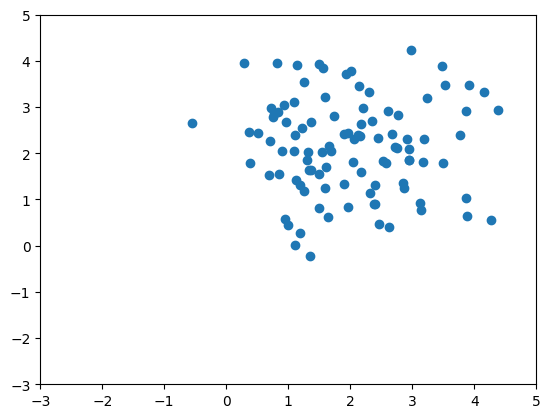

In [91]:
from sklearn.datasets import make_blobs
centers = [[2, 2]]
X, labels_true = make_blobs(
    n_samples=100, centers=centers, cluster_std=1, random_state=0)
x = X[:,0]
y = X[:,1]

plt.scatter(x,y)
plt.ylim(-3,5)
plt.xlim(-3,5)

Ahora voy a aplicar la transformacion lineal E(2) a esos puntos.

(-3.0, 5.0)

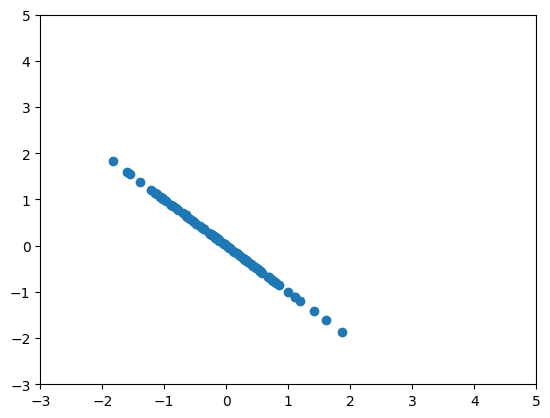

In [92]:
mat=np.array([x,y])
mat_trans=f.En(2)@mat

plt.scatter(mat_trans[0],mat_trans[1])
plt.ylim(-3,5)
plt.xlim(-3,5)

Conclusión: E<sub>n</sub> hace todo lo siguiente:
* centra los datos en el origen
* los colapsa a 1 dimensión (al menos con $E_2$. ¿Quizá lo que hace $E_n$ es bajar a n-1 dimensiones?)


**(A)** Probar que para cualquier vector $ z \in \mathbb{R}^n$, el promedio de las componentes del vector $E_{n}z$ es 0.

$$E_{n}z = (I_{n} - \dfrac{1}{n} e e^t)z$$
idea : $$ e^t z = \sum_{i=0}^{n}z_i $$
$$ E_n z = (I_n z - \dfrac{1}{n} e e^tz)$$
$$ E_n z = z - \dfrac{1}{n} e e^tz $$
Quiero ver que:
$$ \dfrac{1}{n} \sum_{i=0}^{n}v_i = 0$$
Con $E_n z = v$
Reemplazo:
$$ \dfrac{1}{n} \sum_{i=0}^{n} (z - \dfrac{1}{n}ee^tz )=0$$
$$ \dfrac{1}{n} \sum_{i=0}^{n} z_i - \dfrac{1}{n} \sum_{i=0}^{n}\dfrac{1}{n}e_i \sum_{i=0}^{n} z_i =0 $$
Pero:
$$ \sum_{i=0}^{n}\dfrac{1}{n}e_i  = 1$$
Entonces nos queda:
$$ \dfrac{1}{n} \sum_{i=0}^{n} z_i - \dfrac{1}{n} \sum_{i=0}^{n} z_i = 0 $$
Q.E.D.

**(B)** Calcular analiticamente todos los autovalores y autovectores de En. Determinar la imagen y el núcleo de $E_n$, y la dimensión de los mismos.

Sugerencia: considerar la base de vectores {${e, d_2, . . . , d_n}$} de  $ z \in \mathbb{R}^n$ siendo {${{d_2, . . . , d_n}}$} una base de ${⟨e⟩^⊥}.$

Consideremos la base dada de vectores {$ {e, d_2, ..., d_n}$}, donde {$ {d_2, ..., d_n}$} es ortogonal a $⟨e⟩$.


Si $e \in B(E_n)$ veamos entonces que e es Nucleo:

$$ E_n e = (I_n - \dfrac{1}{n} e e^t)e$$
$$ E_n e = e - \dfrac{1}{n} ee^te$$
Pero $e^{t}e = n$
$$ e - \dfrac{1}{n} en = 0$$
$$ \therefore e \in Nu(E_n) $$

A partir de esto podemos ver que $e es uno de los autovectores de $E_n$ y su autovalor vale 0.

Ahora, para que $⟨e⟩$ y {$ {d_2, ..., d_n}$}  sean ortogonales se tiene que cumplir:
$$ ⟨e^t, d_i⟩=0 \space \forall i$$

$$ E_n d = (I_n - \dfrac{1}{n} e e^t)d $$ 
$$ E_n d= d - \dfrac{1}{n} e e^t d   $$
$$ E_n d= d - \dfrac{1}{n} e (e^t d)   $$
$$ E_n d= d - \dfrac{1}{n} e * 0   $$
$$\therefore E_n d = d $$
Esta es la definición de autovector. Por lo que $d$ es autovector de $E_n$, con autovalor $\lambda=1$.

Como {$ {d_2, ..., d_n}$} es ortogonal a $e$,{$ {d_2, ..., d_n}$} es la imagen.

Además, su dimensión es $n-1$ por el teorema de las dimensiones y $e \in Nu(E_n)$, entonces $dim(Nu(E_n)) = 1$.

**(C)** Probar que $E_n$ es una matriz de proyección ortogonal. ¿Sobre qué subespacio proyecta?

Un proyector cumple que $P = P^2$. Entonces quiero ver que $E_n=(E_n)^2$

$$(E_n)^2 = (I - \dfrac{1}{n} e e^t)^2$$
$$(E_n)^2= I^2-2 I \dfrac{1}{n} e e^t+ (\dfrac{1}{n} e e^t)^2$$ 
$$(E_n)^2=  I - \dfrac{2}{n} e e^t + \dfrac{1}{n^2} (e e^t)^2$$
$$(E_n)^2=  I - \dfrac{2}{n} e e^t + \dfrac{1}{n^2} n e e^t$$
$$(E_n)^2=  I - \dfrac{2}{n} e e^t + \dfrac{1}{n} e e^t$$
$$(E_n)^2 = I - \dfrac{1}{n} e e^t$$
$$(E_n)^2 = E_n$$

Cumple con la propiedad, por lo que $E_n$ es un proyector.

Ahora queremos ver que además es ortogonal. Por propiedades de los proyectores, un proyector que además es simétrico es un proyector ortogonal. Entonces veamos si se cumple que es simètrico, o sea que $(E_n)^t = E_n$ ,

$$(E_n)^t = (I - \dfrac{1}{n} e e^t)^t$$
$$(E_n)^t = I^t - \dfrac{1}{n} (e e^t)^t$$
$$(E_n)^t = I - \dfrac{1}{n} e e^t$$
$$(E_n)^t = E_n$$


Proyecta sobre el el espacio ortogonal a $e$. Es decir, cualquier vector que cumpla $e*v=0$.

**(D)** Responder Verdadero o Falso, demostrando o dando un contraejemplo:

*(i)* ¿$E_n$ es una matriz ortogonal?

Debe cumplir $(E_n)^t * E_n = I_n$

Ya se demostó en el ejercicio (C) que $(E_n)^t = E_n$ y $(E_n)^2 = E_n$.

Entonces se deduce que $(E_n)^t * E_n = E_n \neq I_n $.

En conclusión, $E_n$ **no es ortogonal**

$\space$

*(ii)* ¿$E_n$ es singular?

Como $E_n$ tiene núcleo de dimensión 1, o sea existen vectores no nulos que anulan la matriz, y su determinante es 0, podemos afirmar que **es singular**. 

$\space$

*(iii)* ¿$E_n$ es definida positiva?

Para que sea definida positiva, debe tener todos los menores positivos , pero la matriz $E_n$ tiene determinante = 0. Entonces $E_n$ **no es definida positiva**.

Veamos que pasa si intentamos que cumpla la condición $e^t E_n e > 0 $:

$$e^t(I_n-\dfrac{1}{n} e e^t)e > 0$$
$$ e^t(e - \dfrac{1}{n} e e^t e) > 0 $$
$$ e^t e - \dfrac{1}{n} e^t e e^t e > 0 $$
$$ e^t e - \dfrac{1}{n} (e^t e)^2 > 0$$
$$ n - \dfrac{1}{n} (n)^2 > 0$$
$$ n - n > 0$$
$0 > 0$ es absurdo. Entonces, queda demostrado que $E_n$ no es definida positiva.

$\space$

*(iv)* ¿$traza(E_n) = n − 1$?

Dado que $E_n = I - \dfrac{1}{n}e e^t$ Entonces cada elemento de su diagonal es igual a $1-\dfrac{1}{n}$ 

Entonces, dado que
$$Traza(E_n) = \sum_{i=1}^{n}(E_n)_{ii}$$
$$Traza(E_n) = n (1- \dfrac{1}{n})$$
$$Traza(E_n) = n - n \dfrac{1}{n}$$
$$Traza(E_n) = n - 1$$

En conclusión, **es verdadero** que $Traza(E_n) = n - 1$


### Consigna 7

Primero, buscamos la matriz de covarianzas de A_AA.

In [94]:
# Normalizamos A_AA 
norm_AA = f.En(40)@A_AA

# Calculamos la matriz de covarianza
cov_AA=norm_AA.T@norm_AA/(39)

Ahora, buscamos los 2 primeros autovalores con el algoritmo de deflación de Hotelling.

In [98]:
avecsAA,avalsAA=f.hotelling(cov_AA,2,0.001)


In [96]:
avecsAA

[array([ 1.56392897e-01,  1.96536904e-02, -9.55983265e-04,  1.02788784e-03,
         6.64698669e-01,  1.81350854e-01,  1.77308431e-01,  4.66060042e-01,
         4.62637535e-02,  4.14906795e-01,  1.72441200e-01,  7.43483650e-03,
         1.91992439e-01,  7.54123711e-02,  1.39292055e-02, -3.38514714e-02,
         6.28039703e-03,  1.47153532e-02,  1.68217775e-02,  6.00213174e-03,
         3.15491756e-02,  1.78320100e-04, -1.06109841e-02,  2.55003231e-02,
        -1.16018023e-03,  1.26221279e-02,  4.98315506e-03,  1.72515135e-02,
         5.69055783e-03,  9.36410764e-03,  1.16318503e-02,  1.00662190e-02,
         3.64383262e-03, -4.62069221e-03, -6.49521543e-05,  8.46672243e-03,
         8.16572534e-03,  1.00894375e-02,  1.30899960e-02,  1.42778915e-02]),
 array([-0.07498394, -0.10829802, -0.1190639 , -0.07430316,  0.14055987,
        -0.0647268 , -0.09889582,  0.05733729, -0.17248624,  0.00242255,
        -0.0482844 , -0.08319369, -0.02832354, -0.0863239 , -0.14812351,
        -0.13035728

In [99]:
avalsAA

[np.float64(0.024941998443950935), np.float64(0.010232539710494475)]

### Consigna 8

Vamos a proyectar las filas de A_AA en 2 dimensiones. Para eso, usamos que 

$$ A_{proy} = A U $$

siendo U la matriz de autovectores de A

In [100]:
U=np.array([avecsAA[0],avecsAA[1]]).T
proyAA=A_AA@U


Graficamos los puntos en un scatterplot.

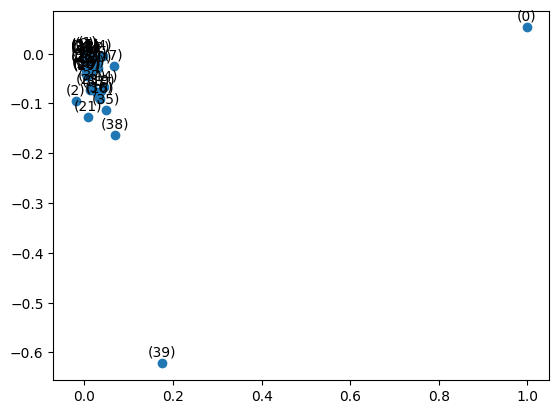

In [101]:
x = [punto[0] for punto in proyAA]
y = [punto[1] for punto in proyAA]

plt.scatter(x,y)

for i, (xi, yi) in enumerate(proyAA):
    plt.annotate(f'({i})', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

Hacemos "zoom" sobre el cluster grande para ver mejor.

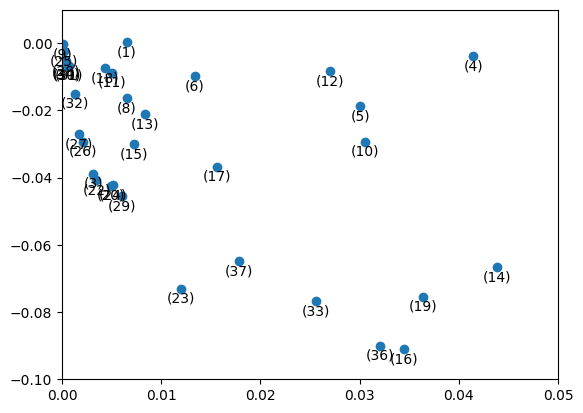

In [102]:
plt.scatter(x,y)

for i, (xi, yi) in enumerate(proyAA):
    plt.annotate(f'({i})', (xi, yi), textcoords="offset points", xytext=(0, -10), ha='center')

plt.xlim(0,0.05)
plt.ylim(-0.1,0.01)
plt.show()

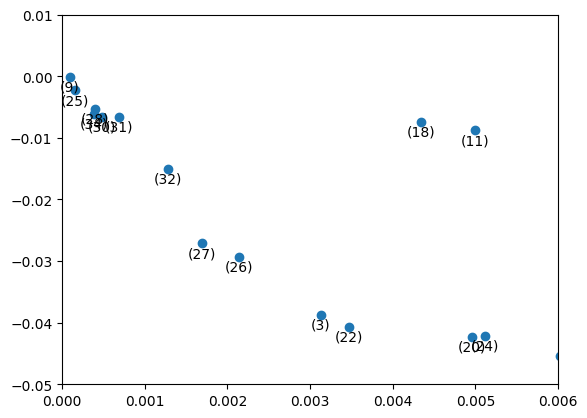

In [104]:
plt.scatter(x,y)

for i, (xi, yi) in enumerate(proyAA):
    plt.annotate(f'({i})', (xi, yi), textcoords="offset points", xytext=(0, -10), ha='center')

plt.xlim(0,0.006)
plt.ylim(-0.05,0.01)
plt.show()

Identificamos estos 3 clusters:

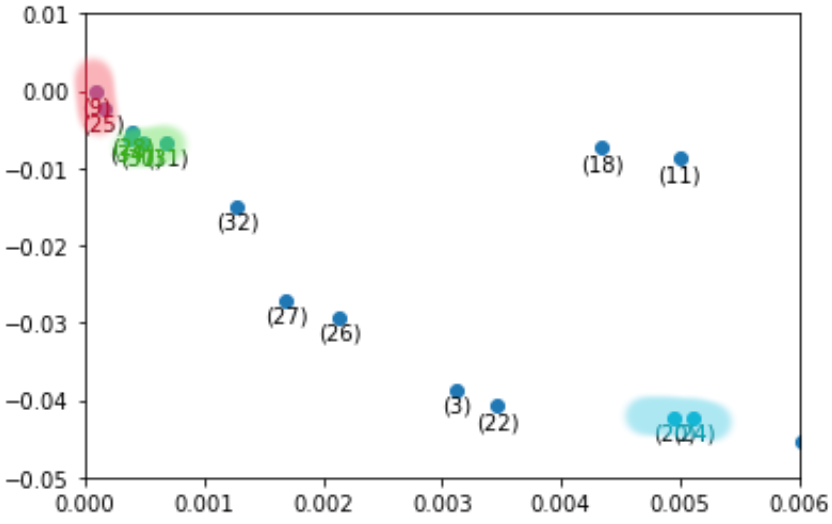

* <font color="blue">puntos 20 y 24</font>
* <font color="green">puntos 28, 30, 31 y 44</font>
* <font color="red">puntos 9 y 25</font>

¿Será que son sectores similares de la economía?

Puntos | Sectores económicos 
:---: | :---: 
20, 24 | Productos fabricados de metal (excepto maquinarias y equipos); Productos de caucho y plástico
28, 30, 31, 34 | Radio, televisión y equipos de telecomunicaciones; Vehículos de motor, remolques y semirremolques; Aeronaves y naves espaciales ; Electricidad y gas
9, 25 | Bebidas; Maquinarias y equipos (excluye maquinaria eléctrica)

Vemos alguna relacion entre sectores (por ejemplo el primer cluster son ambos productos básicos de la industria; en el segundo cluster vehiculos y aeronaves son 2 medios de transporte) pero también hay no-relaciones que nos hacen intuir que es casualidad que esten tan cerca (por ejemplo en el tercer cluster; esperemos que nadie realmente esté mezclando bebidas con maquinarias pesadas!)

# Matriz H

### Consigna 9

¿Qué relación tiene la matriz H con la suma de potencias vistas en la primera sección?

$$ H = A (I − A)^{−1}  \space\space\space \land \space\space\space (I − A)^{−1} =  \sum^{\infty}_{i=0}  A^{i}$$ 
$$ H = A  \cdot \left( \sum^{\infty}_{i=0}  A^{i} \right)$$
$$ H = \sum^{\infty}_{i=0}  A \cdot A^{i} $$
$$ H = \sum^{\infty}_{i=0}  A^{i+1} $$
$$ H = \sum^{\infty}_{i=1}  A^{i} $$
$$ H =  A+ A^{2}+ A^{3}+ ...+ A^{n}+ ...$$
$$ H =  (I − A)^{−1} - I$$

H es igual a la serie infinita menos la matriz indentidad.

### Consigna 10

Generamos las matrices H para A<sub>AA</sub> y A<sub>HH</sub>

In [106]:
H_AA=A_AA@f.leontiefizar(A_AA)
H_HH=A_HH@f.leontiefizar(A_HH)


In [107]:
# Hallamos los primeros 2 autovectores de cada matriz

avecsHAA,avalsHAA=f.hotelling(H_AA,2,0.001)
avecsHHH,avalsHHH=f.hotelling(H_HH,2,0.001)


# Hallamos la matriz U de cada una

U_HAA=np.array([avecsHAA[0],avecsHAA[1]]).T
U_HHH=np.array([avecsHHH[0],avecsHHH[1]]).T


# Encontramos la proyeccion de cada fila de cada matriz en 2 dimensiones
proy_HAA=H_AA@U_HAA
proy_HHH=H_HH@U_HHH


Ploteamos lo de Argentina en azul y lo de Honduras en rojo.

C:\Users\Victoria\AppData\Local\Temp\ipykernel_2104\1932937461.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  grafico.show()


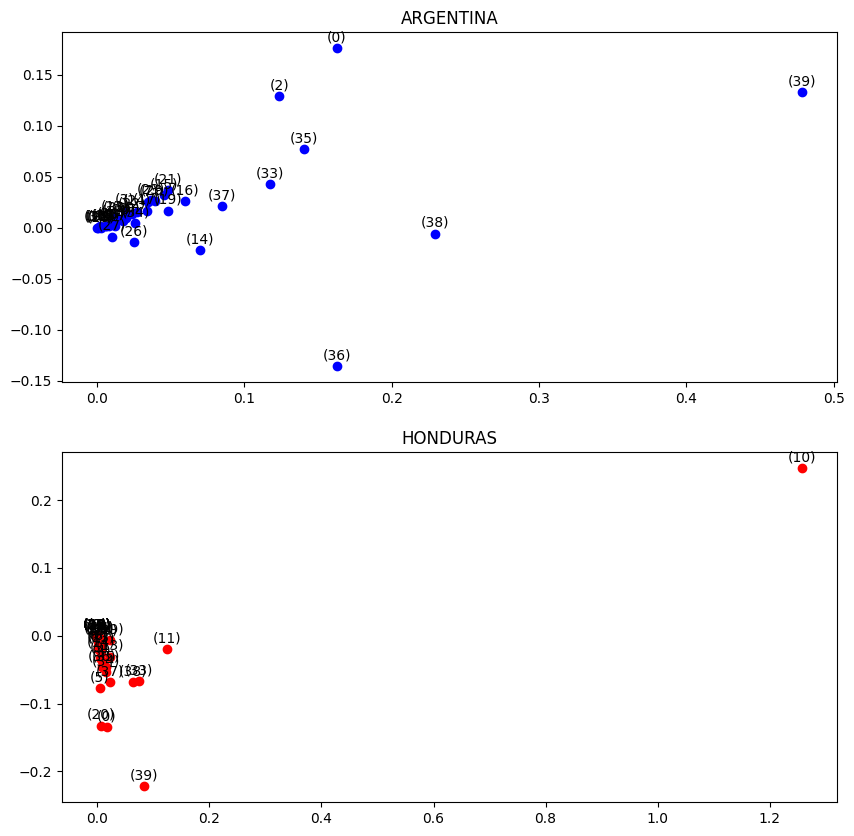

In [108]:
xA = [punto[0] for punto in proy_HAA]
yA = [punto[1] for punto in proy_HAA]
xH = [punto[0] for punto in proy_HHH]
yH = [punto[1] for punto in proy_HHH]


grafico, (arg, hnd) = plt.subplots(2, 1, figsize=(10, 10))  

arg.scatter(xA,yA,label='ARG', color='blue')
arg.set_title('ARGENTINA')
for i, (xi, yi) in enumerate(proy_HAA):
    arg.annotate(f'({i})', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')


hnd.scatter(xH,yH,label='HND', color='red')
hnd.set_title('HONDURAS')
for i, (xi, yi) in enumerate(proy_HHH):
    hnd.annotate(f'({i})', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

grafico.show()


Nuevamente haremos zoom para ver mejor los puntos que estàn juntos.

C:\Users\Victoria\AppData\Local\Temp\ipykernel_2104\4077976246.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  grafico.show()


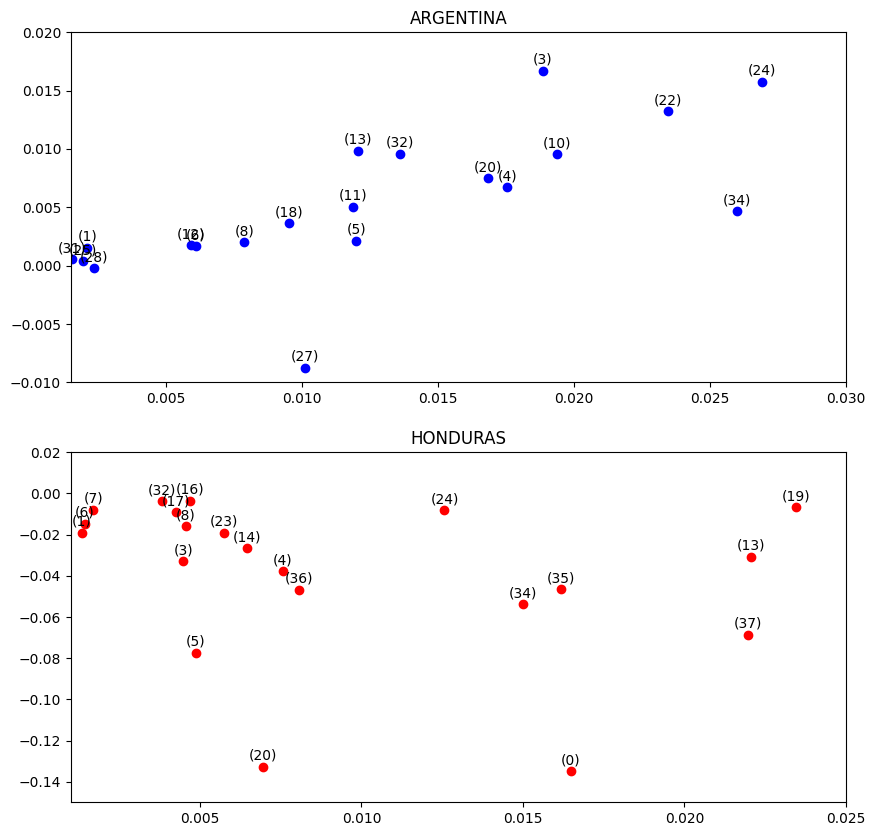

In [109]:
grafico, (arg, hnd) = plt.subplots(2, 1, figsize=(10, 10))  

arg.scatter(xA,yA,label='ARG', color='blue')
arg.set_title('ARGENTINA')
arg.set_xlim(0.0015,0.03)
arg.set_ylim(-0.01,0.02)

for i, (xi, yi) in enumerate(proy_HAA):
    arg.annotate(f'({i})', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')


hnd.scatter(xH,yH,label='HND', color='red')
hnd.set_title('HONDURAS')
#hnd.set_xlim(0.001,0.025)
#hnd.set_ylim(-0.05,0.01)
hnd.set_xlim(0.001,0.025)
hnd.set_ylim(-0.15,.02)
for i, (xi, yi) in enumerate(proy_HHH):
    hnd.annotate(f'({i})', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

grafico.show()




En Argentina vemos cercanos los siguientes puntos:

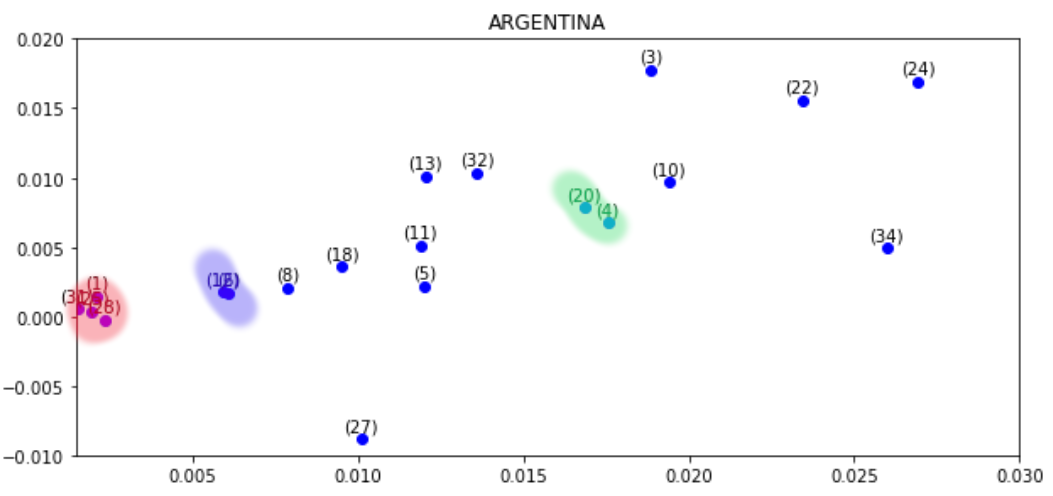


Puntos | Sectores económicos 
:---: | :---: 
12, 6 | Confecciones (Prendas de vestir); Molinería, panadería y pastas
1, 25, 28, 31,  |  Agricultura y forestal; Maquinarias y equipos (excluye maquinaria eléctrica); Radio, televisión y equipos de telecomunicaciones; Aeronaves y naves espaciales 
20, 4 | Productos de caucho y plástico, Minería (no energía)


No vemos relacion entre confección de prendas de vestir y la industria de la harina, pero sì la agricultura y la industria forestal está íntimamente relacionada con la producción de maquinarias y equipos (tractores, cosechadoras, procesadoras de arboles, etc.). Equipos de telecomunicaciones y radio podrìa decirse que se relaciona con aeronaves, por tema de radar y comunicaciones en el aire. Finalmente, dependiendo de qué signifique "Minería (no energía)", por ejemplo si involucra petróleo, puede argumentarse que se relaciona con la producción de productos de plástico (es materia prima).

En Honduras vemos cercanos los siguientes puntos:


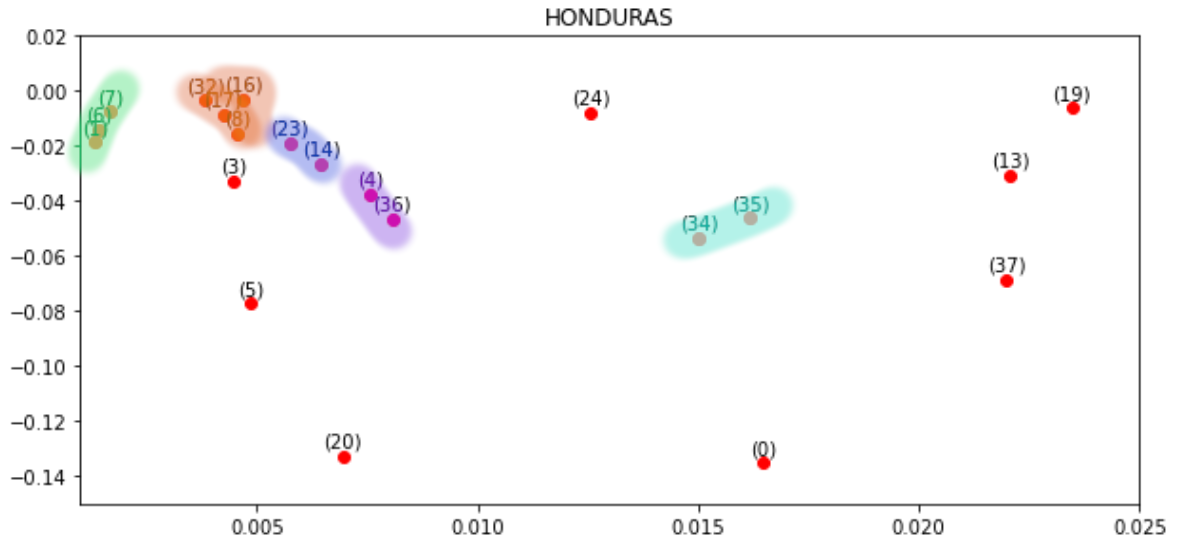

Puntos | Sectores económicos 
:---: | :---: 
1, 6, 7|  Agricultura y forestal; Molinería, panadería y pastas; Azúcar y productos de confitería 
8, 16, 17, 32 |  Otros productos alimenticios; Coque, petróleo refinado y combustible nuclear; Productos químicos básicos; Otro equipo de transporte
4, 36 | Minería (no energía); Transporte
34, 35 | Electricidad y gas; Construcción
 

Acá la relación es mucho más clara. 
* Entre 1, 6, 7 es obvia: la agricultura provee de materias primas a la molineria y al azúcar.
* Coque, petróleo están muy relacionados con la industria química y con "otros equipos de transporte" (no automoviles ni remolques ni aviones, son aparte) 
* Electricidad y gas se relacionan con la construcción en que las áreas donde se contruye son típicamente urbanas, y por lo tanto zonas de gran demanda de electricidad y gas. 

### Consigna 11

Vamos a analizar el perfil de producción para sectores bien diferenciados.

Primero, en el espacio de ACP en 2 dimensiones, calculamos las distancias al origen de coordenadas de cada punto. Lo haremos con un dataframe para cada pais, que luego ordenamos por valor de distancia para identificar el sector más lejano y el más cercano al origen.

In [110]:
datosA_AA = pd.DataFrame({"dim1":x,"dim2":y})
datosA_AA["norma2"]=datosA_AA.dim1**2+datosA_AA.dim2**2
datosA_AA.sort_values(by='norma2', ascending=True, inplace=True)

datosH_AA = pd.DataFrame({"dim1":xA,"dim2":yA})
datosH_AA["norma2"]=datosH_AA.dim1**2+datosH_AA.dim2**2
datosH_AA.sort_values(by='norma2', ascending=True, inplace=True)

print(f'El sector más cercano al origen en A_AA es: {datosA_AA.index[0]}; el más lejano es {datosA_AA.index[39]}')
print(f'El sector más cercano al origen en H_AA es: {datosH_AA.index[0]}; el más lejano es {datosH_AA.index[39]}')

El sector más cercano al origen en A_AA es: 9; el más lejano es 0
El sector más cercano al origen en H_AA es: 9; el más lejano es 39


Graficamos la producción (fila) en Arr y H de estos dos sectores.


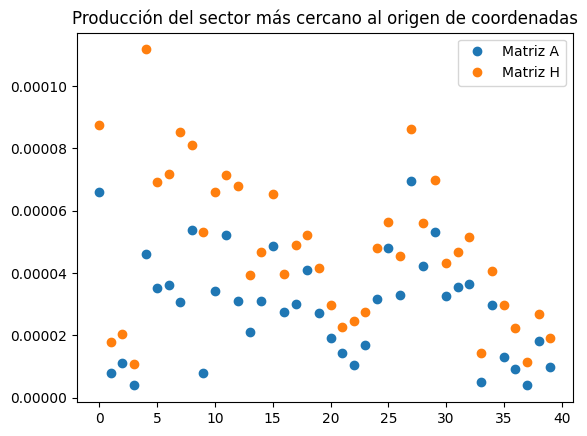

In [111]:
plt.plot(A_AA[9],"o",label="Matriz A")
plt.plot(H_AA[9],"o",label="Matriz H")

#plt.plot(np.log(A_AA[9]),"o",label="Matriz A")
#plt.plot(np.log(H_AA[9]),"o",label="Matriz H")
plt.title('Producción del sector más cercano al origen de coordenadas')
plt.legend()

El sector más cercano al origen en el PCA es el 9: Bebidas. 

Hay 2 motivos por el cual caeria cerca del origen:
1. no es un dato relevante y no tendria valor proyectado con NINGUN autovector
1. su variacion no se explica con los autovectores usados; quizá con un tercer o cuarto autovector se explicaria mejor.

Vemos que hay muy poca variacion entre la A y la H en este sector de la industria. 

En Argentina, la industria de la bebida está muy presente (industria vitivinicola, fábricas de cerveza por montones, ni hablar de producción de gaseosas), asi que es muy factible que estemos frente a un caso de (2): los autovectores usados no explican la varianza de este sector. 

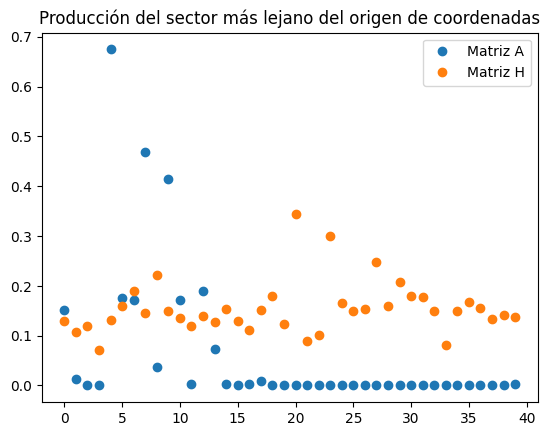

In [112]:
plt.plot(A_AA[0],"o",label="Matriz A")
plt.plot(H_AA[39],"o",label="Matriz H")
#plt.plot(np.log(A_AA[0]),"o",label="Matriz A")
#plt.plot(np.log(H_AA[39]),"o",label="Matriz H")
plt.title('Producción del sector más lejano del origen de coordenadas')
plt.legend()

Los sectores más alejados (es decir: los más activos o mejor explicados por los autovectores elegidos) fueron:
* el 0 (Agricultura y forestal) para A, que tiene todo el sentido del mundo para un pais agroexportador como Argentina. Tiene picos de producción muy marcados para unos pocos sectores, pero para la mayoria produce cero o cercano a 0; justamente por ser un pais agro*exportador* tiene sentido que la demanda interna de productos agropecuarios se limite a unos rubros muy especificos. 
* el 39 (Servicios a empresas) para H, lo que nos sorprendió en un principio. Investigamos qué es "Servicios a empresas" y <a href="https://repositorio.cepal.org/server/api/core/bitstreams/e70def69-e035-4698-b375-e3d4b514d3e3/content">una fuente del CEPAL</a> nos informó que incluye cosas como consultoria, I+D, publicidad, call centers, investigaciones de mercado, asesoramiento judírico, contable y financiero, y muchas cosas más que toda empresa, independientemente de cuál sea su rubro, necesita. Así que tiene mucho sentido ver plasmado en el gráfico que *todos* los sectores de la economía demanden su producción en mayor o menor medida (pero casi uniformemente). 